# 서울시 업무추진비 분석


## https://opengov.seoul.go.kr
## https://github.com/seoul-opengov/opengov

# O. 한글폰트 설치 후 진행

> ## 1) 한글 폰트 설치

In [ ]:
# import matplotlib.font_manager as fm

# # Linux
# !apt-get -qq -y install fonts-nanum > /dev/null

# # Colab
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname = fontpath, size = 10)
# fm._rebuild()

> ## 2) <font color = 'red'>설치 후 '**런타임 다시 시작**'</font>

* 런타임 강제 종료 후 다시 시작

In [ ]:
# import os

# os.kill(os.getpid(), 9)

> ## 3) 한글 폰트 설정

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# import matplotlib.font_manager as fm

# mpl.rcParams['axes.unicode_minus'] = False
	
# path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
# font_name = fm.FontProperties(fname = path, size = 10).get_name()
# plt.rc('font', family = font_name)
# fm._rebuild()

In [1]:
import matplotlib.pyplot as plt
import matplotlib as rc
from matplotlib import rcParams
import matplotlib.font_manager as fm
from pathlib import Path
import matplotlib.patches as mpatches

# 한글만 사용시 
rcParams['font.family'] = 'Malgun Gothic'

# # 특정 한글 폰트 사용시
# font_path = Path('C:/Users/SBAUser/PycharmProjects/SESAC_AIoT/example/secret/font/nanum-gothic/NanumGothic.ttf')
# fontprop = fm.FontProperties(fname=font_path, size=10)

# I. 데이터 수집

In [2]:
import warnings
warnings.filterwarnings('ignore')

> ## 1) 파일 다운로드 함수 정의

* 01. github 경로 지정
* 02. 다운로드 폴더 지정
* 03. 다운로드 폴더 확인 또는 생성
* 04. 1월 ~ 12월 업무추진비 파일 다운로드

In [3]:
import requests
import os
import pathlib

def get_seoul_expense_list(extension, year, data_folder): 

    # 01
    expense_list_year_url = 'https://github.com/seoul-opengov/opengov/raw/master/expense_list' + str(year) + '/'

    # 02
    expense_list_year_dir = data_folder + str(year) + '/'
    
    # 03
    if(os.path.isdir(expense_list_year_dir)):
        print('폴더({0})가 존재합니다. {0}년 데이터의 다운로드를 시작합니다.'.format(year))
    else:
        print('폴더({0})를 생성했습니다. {0}년 데이터의 다운로드를 시작합니다.'.format(year))
        pathlib.Path(expense_list_year_dir).mkdir(parents = True, exist_ok = True) 
        
    # 04
    for k in range(12):
        file_name = '{0}{1:02d}_expense_list.{2}'.format(year, k+1, extension)    
        url = expense_list_year_url + file_name
        print(url)
        r = requests.get(url)
        with open(expense_list_year_dir + file_name, 'wb') as f:
            f.write(r.content)

> ## 2) 함수 실행 옵션

* 파일 타입 지정
* 연도 지정(2017~2019)
* 폴더 지정

In [4]:
extension = 'csv' 

years = [2017, 2018, 2019]

data_folder = 'data_folder_' 

> ## 3) 파일 다운로드 함수 실행

In [5]:
for year in years:
  get_seoul_expense_list(extension, year, data_folder)

폴더(2017)를 생성했습니다. 2017년 데이터의 다운로드를 시작합니다.
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201701_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201702_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201703_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201704_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201705_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201706_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201707_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201708_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201709_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201710_expense_list.csv
https://github.com/seoul-ope

> ## 4) 다운로드 결과 확인

In [6]:
# !ls -l data_folder_*

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [7]:
# 현재 경로 지정
import os
currentPath = os.getcwd()
currentPath
os.chdir('../../secret/homework_data/DA03_seoul_expense')
os.getcwd()

'C:\\Users\\SBAUser\\PycharmProjects\\SESAC_AIoT\\secret\\homework_data\\DA03_seoul_expense'

# II. 데이터 전처리

> ## 1) 파일 구조 및 정보 확인

* 파일 한 개 사용

In [8]:
import pandas as pd

df = pd.read_csv('data_folder_2017/201701_expense_list.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nid                5517 non-null   int64  
 1   title              5517 non-null   object 
 2   url                5517 non-null   object 
 3   dept_nm_lvl_1      5517 non-null   object 
 4   dept_nm_lvl_2      5517 non-null   object 
 5   dept_nm_lvl_3      4842 non-null   object 
 6   dept_nm_lvl_4      1350 non-null   object 
 7   dept_nm_lvl_5      252 non-null    object 
 8   exec_yr            5517 non-null   int64  
 9   exec_month         5517 non-null   int64  
 10  expense_budget     274 non-null    float64
 11  expense_execution  202 non-null    float64
 12  category           115 non-null    object 
 13  dept_nm_full       5517 non-null   object 
 14  exec_dt            5517 non-null   object 
 15  exec_loc           5467 non-null   object 
 16  exec_purpose       5516 

> ## 2) 함수 정의

* 열(Column) 이름 확인

In [10]:
df.columns

Index(['nid', 'title', 'url', 'dept_nm_lvl_1', 'dept_nm_lvl_2',
       'dept_nm_lvl_3', 'dept_nm_lvl_4', 'dept_nm_lvl_5', 'exec_yr',
       'exec_month', 'expense_budget', 'expense_execution', 'category',
       'dept_nm_full', 'exec_dt', 'exec_loc', 'exec_purpose', 'target_nm',
       'payment_method', 'exec_amount'],
      dtype='object')

* 열(Column) 이름 변경 함수 

In [11]:
def change_csv_file_first_line_value(old_file_name, new_file_name):
    # 읽기 모드 열기
    with open(old_file_name, encoding = 'utf-8') as f:  
        # 한 줄씩 lines 리스트의 각 요소에 할당
        lines = f.read().splitlines()
    
    # 변경할 열(Column) 이름 지정
    lines[0] = 'nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,\
부서레벨5,집행연도,집행월,예산,집행,구분,부서명,\
집행일시,집행장소,집행목적,대상인원,결제방법,집행금액'
    
    # 쓰기 모드 열기
    with open(new_file_name, 'w', encoding = 'utf-8') as f:  
        # 리스트 각 요소 개행문자(\n)로 연결해서 파일 저장
        f.write('\n'.join(lines))

* '_new' 추가한 새파일 저장 함수

In [12]:
# 인자: 연도, 데이터 파일이 있는 폴더
def change_year_csv_file_first_line_value(year, data_folder): 

    # 파일 폴더 지정
    expense_list_year_dir = data_folder + str(year) + '/'
    
    # 확장자 이름
    extension = 'csv' 
    
    # 지정한 폴더에 있는 월별 업무추진비 파일에서 첫 번째 줄의 열 이름을 변경 
    for k in range(12):
        # 기존 파일 이름
        old_file_name = expense_list_year_dir + '{0}{1:02d}_expense_list.{2}'.format(year, k+1, extension) 
        
        # 새파일 이름
        new_file_name = expense_list_year_dir + '{0}{1:02d}_expense_list_new.{2}'.format(year, k+1, extension) 
  
        # 열(Column) 이름 변경 함수
        change_csv_file_first_line_value(old_file_name, new_file_name)

> ## 3) 함수 적용

In [13]:
data_folder = 'data_folder_'

years = [2017, 2018, 2019]

for year in years:
    print('{}년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.'.format(year))
    change_year_csv_file_first_line_value(year, data_folder)

print('모든 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일로 저장했습니다.')

2017년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.
2018년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.
2019년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.
모든 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일로 저장했습니다.


* 새파일 생성 확인

In [ ]:
# !ls -l data_folder_*/*new.csv

-rw-r--r-- 1 root root 2101920 Sep 23 06:45 data_folder_2017/201701_expense_list_new.csv
-rw-r--r-- 1 root root 2191451 Sep 23 06:45 data_folder_2017/201702_expense_list_new.csv
-rw-r--r-- 1 root root 2320221 Sep 23 06:45 data_folder_2017/201703_expense_list_new.csv
-rw-r--r-- 1 root root 2064533 Sep 23 06:45 data_folder_2017/201704_expense_list_new.csv
-rw-r--r-- 1 root root 2072985 Sep 23 06:45 data_folder_2017/201705_expense_list_new.csv
-rw-r--r-- 1 root root 2436384 Sep 23 06:45 data_folder_2017/201706_expense_list_new.csv
-rw-r--r-- 1 root root 2274606 Sep 23 06:45 data_folder_2017/201707_expense_list_new.csv
-rw-r--r-- 1 root root 2271746 Sep 23 06:45 data_folder_2017/201708_expense_list_new.csv
-rw-r--r-- 1 root root 2297123 Sep 23 06:45 data_folder_2017/201709_expense_list_new.csv
-rw-r--r-- 1 root root 2043300 Sep 23 06:45 data_folder_2017/201710_expense_list_new.csv
-rw-r--r-- 1 root root 2600176 Sep 23 06:45 data_folder_2017/201711_expense_list_new.csv
-rw-r--r-- 1 root roo

* 열(Column) 이름 변경 확인

In [14]:
df_new = pd.read_csv('data_folder_2017/201701_expense_list_new.csv')

df.columns, df_new.columns

(Index(['nid', 'title', 'url', 'dept_nm_lvl_1', 'dept_nm_lvl_2',
        'dept_nm_lvl_3', 'dept_nm_lvl_4', 'dept_nm_lvl_5', 'exec_yr',
        'exec_month', 'expense_budget', 'expense_execution', 'category',
        'dept_nm_full', 'exec_dt', 'exec_loc', 'exec_purpose', 'target_nm',
        'payment_method', 'exec_amount'],
       dtype='object'),
 Index(['nid', '제목', 'url', '부서레벨1', '부서레벨2', '부서레벨3', '부서레벨4', '부서레벨5', '집행연도',
        '집행월', '예산', '집행', '구분', '부서명', '집행일시', '집행장소', '집행목적', '대상인원', '결제방법',
        '집행금액'],
       dtype='object'))

> ## 4) 결측치 확인

* .info( ) 적용

In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nid     5517 non-null   int64  
 1   제목      5517 non-null   object 
 2   url     5517 non-null   object 
 3   부서레벨1   5517 non-null   object 
 4   부서레벨2   5517 non-null   object 
 5   부서레벨3   4842 non-null   object 
 6   부서레벨4   1350 non-null   object 
 7   부서레벨5   252 non-null    object 
 8   집행연도    5517 non-null   int64  
 9   집행월     5517 non-null   int64  
 10  예산      274 non-null    float64
 11  집행      202 non-null    float64
 12  구분      115 non-null    object 
 13  부서명     5517 non-null   object 
 14  집행일시    5517 non-null   object 
 15  집행장소    5467 non-null   object 
 16  집행목적    5516 non-null   object 
 17  대상인원    5486 non-null   object 
 18  결제방법    5514 non-null   object 
 19  집행금액    5517 non-null   int64  
dtypes: float64(2), int64(4), object(14)
memory usage: 862.2+ KB


* isna( ) 적용
 - '부서레벨3', '부서레벨4', '부서레벨5', '예산', '집행', '구분'

In [16]:
df_new.isna().sum(axis = 0)

nid         0
제목          0
url         0
부서레벨1       0
부서레벨2       0
부서레벨3     675
부서레벨4    4167
부서레벨5    5265
집행연도        0
집행월         0
예산       5243
집행       5315
구분       5402
부서명         0
집행일시        0
집행장소       50
집행목적        1
대상인원       31
결제방법        3
집행금액        0
dtype: int64

> ## 5) 연도별 파일 통합

* 파일 통합 함수 정의

In [17]:
def select_columns_save_file(year, data_folder, drop_columns_list):
    
    expense_list_year_dir = data_folder + str(year) + '/'
    expense_list_tidy_file = '{}_expense_list_tidy.csv'.format(year)
    df_year = pd.DataFrame()
    
    for k in range(12):
        # 새파일 이름 지정
        file_name = '{0}{1:02d}_expense_list_new.csv'.format(year, k+1)
        
        # DtaFrame 형식으로 csv 데이터 불러오기
        df_month = pd.read_csv(expense_list_year_dir + file_name)
        
        # df_month 새로 추가해서 df_year에 다시 할당
        df_year = df_year.append(df_month, ignore_index = True)
        
    df_year_drop = df_year.drop(columns = drop_columns_list)
    new_file_name = expense_list_year_dir + expense_list_tidy_file
    df_year_drop.to_csv(new_file_name, index = False)
    
    print('==> {} 파일 생성'.format(expense_list_tidy_file))

* 함수 실행 옵션

In [18]:
data_folder = 'data_folder_'

years = [2017, 2018, 2019]

drop_columns_list = ['nid', 'url', '부서레벨3', '부서레벨4', '부서레벨5', '예산', '집행', '구분']

* 파일 통합 함수 실행

In [19]:
for year in years:
    print('{}년 파일 통합중...'.format(year))
    select_columns_save_file(year, data_folder, drop_columns_list)
print('파일 통합 완료.')

2017년 파일 통합중...
==> 2017_expense_list_tidy.csv 파일 생성
2018년 파일 통합중...
==> 2018_expense_list_tidy.csv 파일 생성
2019년 파일 통합중...
==> 2019_expense_list_tidy.csv 파일 생성
파일 통합 완료.


* 생성된 통합 파일 확인

In [ ]:
# !ls -l data_folder_*/*tidy*

-rw-r--r-- 1 root root 21435432 Sep 23 06:45 data_folder_2017/2017_expense_list_tidy.csv
-rw-r--r-- 1 root root 22940371 Sep 23 06:45 data_folder_2018/2018_expense_list_tidy.csv
-rw-r--r-- 1 root root 24385017 Sep 23 06:45 data_folder_2019/2019_expense_list_tidy.csv


* 2017 통합 파일 정보

In [20]:
df_2017 = pd.read_csv('data_folder_2017/2017_expense_list_tidy.csv')

df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70132 entries, 0 to 70131
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      70132 non-null  object
 1   부서레벨1   70132 non-null  object
 2   부서레벨2   70074 non-null  object
 3   집행연도    70132 non-null  int64 
 4   집행월     70132 non-null  int64 
 5   부서명     70053 non-null  object
 6   집행일시    70132 non-null  object
 7   집행장소    69360 non-null  object
 8   집행목적    70110 non-null  object
 9   대상인원    69597 non-null  object
 10  결제방법    69929 non-null  object
 11  집행금액    70132 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 6.4+ MB


> ## 6) 전체 파일 통합

* DataFrame : df_expense_all

In [21]:
import pandas as pd

In [22]:
data_folder = 'data_folder_'

years = [2017, 2018, 2019]

df_expense_all = pd.DataFrame()


for year in years:
    expense_list_year_dir = data_folder + str(year) + '/'
    expense_list_tidy_file = '{}_expense_list_tidy.csv'.format(year)
    
    path_file_name = expense_list_year_dir + expense_list_tidy_file
    
    df_expense = pd.read_csv(path_file_name)
    df_expense_all = df_expense_all.append(df_expense, ignore_index = True)

* 전체 통합 DataFrame 확인

In [23]:
df_expense_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216557 entries, 0 to 216556
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   제목      216557 non-null  object
 1   부서레벨1   216557 non-null  object
 2   부서레벨2   216273 non-null  object
 3   집행연도    216557 non-null  int64 
 4   집행월     216557 non-null  int64 
 5   부서명     216478 non-null  object
 6   집행일시    216557 non-null  object
 7   집행장소    214401 non-null  object
 8   집행목적    216535 non-null  object
 9   대상인원    215535 non-null  object
 10  결제방법    216354 non-null  object
 11  집행금액    216557 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 19.8+ MB


* 'seoulExpense.csv' 파일 저장

In [24]:
df_expense_all.to_csv('seoulExpense.csv')

# III.  데이터 분석

> ## 1) 연도별 집행횟수

* 연도별 .value_count( )

In [25]:
df_expense_all.head()

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
0,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000
1,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000
2,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-24 12:35,왕왕생고기 (중구 을지로),장애인 기본돌봄 복지시책 논의간담회,장애인복지정책팀장외7명,카드,80000
3,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-24 12:23,서울불고기 (중구 남대문로),서울시일자리통합지원센터 운영개선 논의간담회,장애인복지정책과장외5명,카드,112000
4,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-23 15:10,서울시청신매점,부서운영에 필요한 음료수 구매,장애인복지정책과직원,카드,16000


In [45]:
df_expense_all['집행연도'].value_counts()

2019    74207
2018    72218
2017    70132
Name: 집행연도, dtype: int64

* 막대그래프 시각화

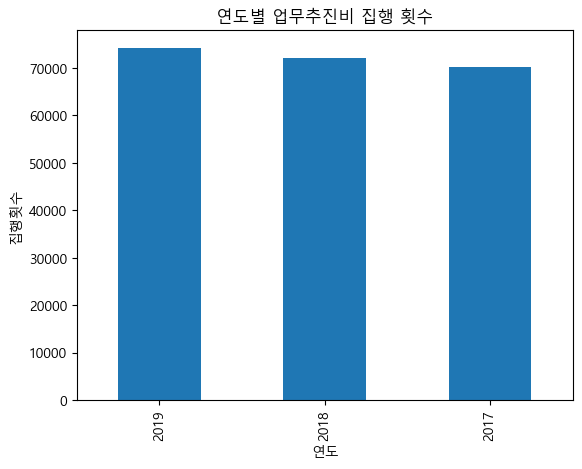

In [49]:
df = df_expense_all['집행연도'].value_counts()
df.plot(kind = 'bar',
       title = '연도별 업무추진비 집행 횟수',
       xlabel = '연도',
       ylabel = '집행횟수') ;

> ## 2) 연도별 집행금액

* 연도별 .pivot_table( )

In [64]:
df_expense_all['집행연도'].value_counts()

2019    74207
2018    72218
2017    70132
Name: 집행연도, dtype: int64

In [72]:
df2 = pd.pivot_table(df_expense_all,
              index = '집행연도',
              values = '집행금액',
              aggfunc = 'sum')
df2

,집행금액
집행연도,
2017,9076941387
2018,9937556542
2019,10532330632


* 막대그래프 시각화

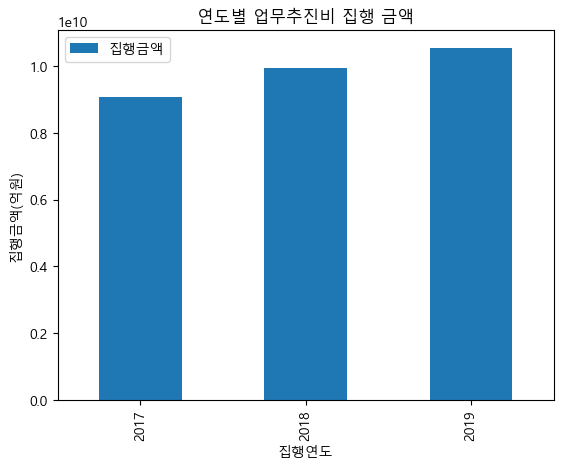

In [73]:
df2.plot(kind = 'bar',
       title = '연도별 업무추진비 집행 금액',
       xlabel = '집행연도',
       ylabel = '집행금액(억원)',
         legend = True) ;

> ## 3) 월별 집행금액

* 월별 .pivot_table( )

In [74]:
df_expense_all['집행월'].value_counts()

12    22835
11    20044
7     18301
3     18021
10    17926
1     17825
4     17617
6     17142
8     17084
2     16638
5     16617
9     16507
Name: 집행월, dtype: int64

In [75]:
df3 = pd.pivot_table(df_expense_all,
              index = '집행월',
              values = '집행금액',
              aggfunc = 'sum')
df3

,집행금액
집행월,
1,2328469179
2,2250971737
3,2314589911
4,2153704599
5,2063883588
6,2224855495
7,2372256669
8,2153716469
9,2417217365


* 연별/월별 .pivot_table( )

In [82]:
df4 = pd.pivot_table(df_expense_all,
              index = '집행월',
              columns = '집행연도',
              values = '집행금액',
              aggfunc = 'sum')
df4

집행연도,2017,2018,2019
집행월,,,
1,710368860,735587570,882512749
2,712679864,769360005,768931868
3,737250454,761059010,816280447
4,635265805,703781418,814657376
5,647582378,669044701,747256509
6,758257342,690652154,775945999
7,701604626,788926477,881725566
8,661174850,730290532,762251087
9,806170700,769404957,841641708


* 막대그래프 시각화

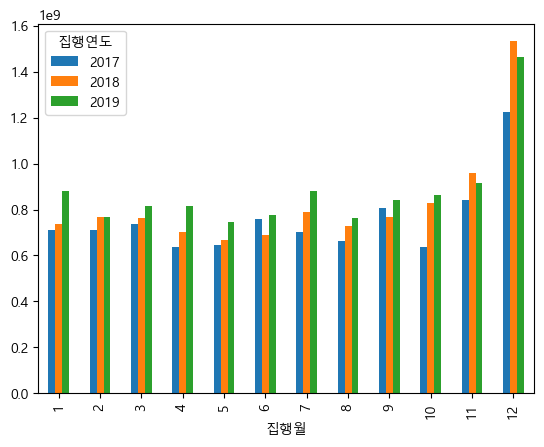

In [83]:
df4.plot(kind='bar');

> ## 4) 부서별 집행금액

* 부서별_level1 .pivot_table( )

In [84]:
df_expense_all.head()

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
0,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000
1,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000
2,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-24 12:35,왕왕생고기 (중구 을지로),장애인 기본돌봄 복지시책 논의간담회,장애인복지정책팀장외7명,카드,80000
3,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-24 12:23,서울불고기 (중구 남대문로),서울시일자리통합지원센터 운영개선 논의간담회,장애인복지정책과장외5명,카드,112000
4,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-23 15:10,서울시청신매점,부서운영에 필요한 음료수 구매,장애인복지정책과직원,카드,16000


In [85]:
df5 = pd.pivot_table(df_expense_all,
              index = '부서레벨1',
              values = '집행금액',
              aggfunc = 'sum')
df5

,집행금액
부서레벨1,
사업소,6552128899
서울시본청,16606242519
소방재난본부(소방서),5147645293
의회사무처,1240811850


* 부서별_level2 .pivot_table( )

In [86]:
df6 = pd.pivot_table(df_expense_all,
              index = '부서레벨2',
              values = '집행금액',
              aggfunc = 'sum')
df6

,집행금액
부서레벨2,
119특수구조단,119225100
감사위원회,343281170
강남소방서,229660520
강동소방서,188773330
강북소방서,167700000
...,...
행정2부시장,522277598
행정국,1320839804
행정자치위원회,57397750


* 집행금액별 내림차순 정렬

In [90]:
df6 = df6.sort_values(by='집행금액', ascending=False)
df6

,집행금액
부서레벨2,
상수도사업본부,2156404778
기획조정실,1572753168
행정국,1320839804
서울특별시장,955448760
시민소통기획관,923338423
...,...
소방행정과,7293000
공무원수련원,4350570
예산결산특별위원회,2048500


* 막대그래프 시각화

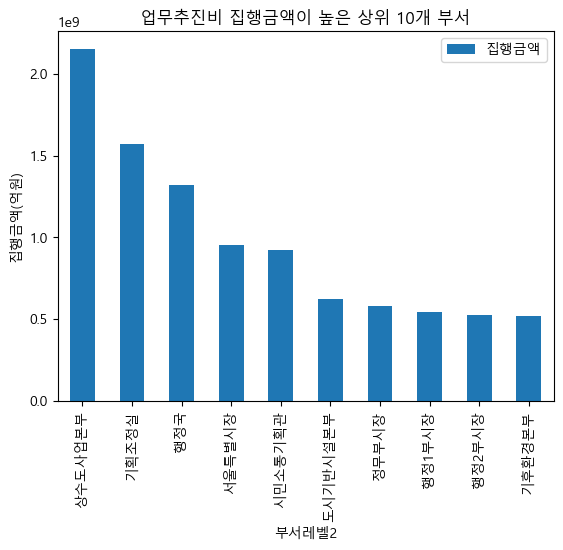

In [95]:
df6[:10].plot(kind='bar', title='업무추진비 집행금액이 높은 상위 10개 부서', ylabel = '집행금액(억원)');

* 워드클라우드 시각화

In [122]:
df7 = df_expense_all.groupby('부서레벨2').sum('집행금액').sort_values(by='집행금액', ascending=False)
df7['집행금액'][:10]

부서레벨2
상수도사업본부     2156404778
기획조정실       1572753168
행정국         1320839804
서울특별시장       955448760
시민소통기획관      923338423
도시기반시설본부     620669144
정무부시장        581806882
행정1부시장       540457390
행정2부시장       522277598
기후환경본부       515222890
Name: 집행금액, dtype: int64

In [149]:
df_expense_all['부서레벨2'].value_counts()

상수도사업본부      16851
기획조정실        11428
행정국           8882
시민소통기획관       6196
기후환경본부        5193
             ...  
소방행정과           44
공무원수련원          40
운영위원회           14
문화체육관광위원회       13
예산결산특별위원회       11
Name: 부서레벨2, Length: 137, dtype: int64

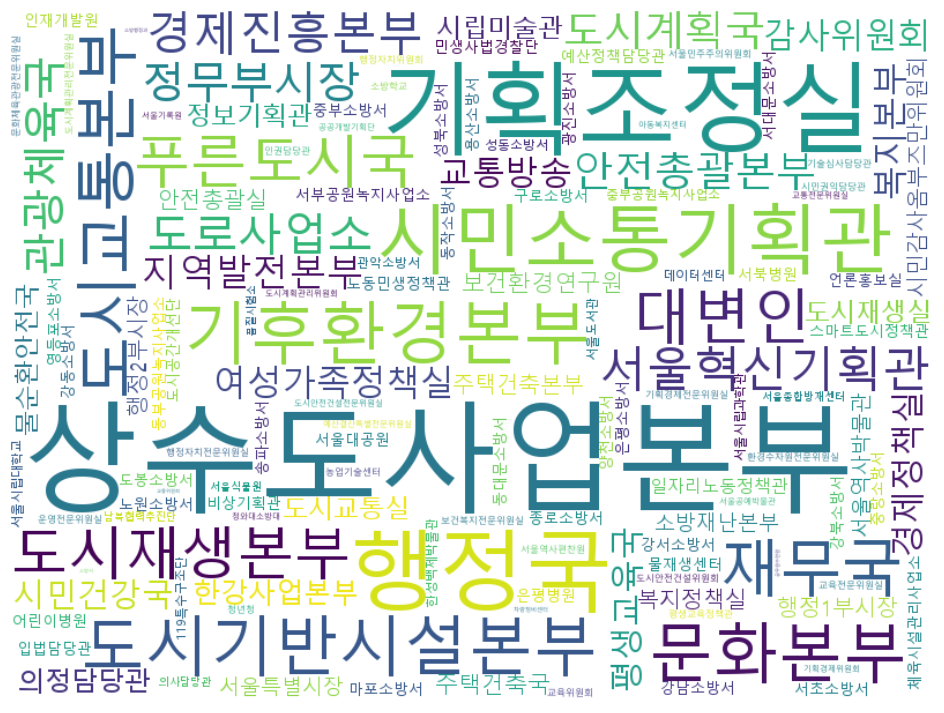

In [156]:
from wordcloud import WordCloud

# 리눅스 경로
# korean_font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# wc = WordCloud(font_path = korean_font_path,
#                background_color='white',
#                width = 800, height = 600)

wc = WordCloud(font_path = 'malgun',
               background_color='white',
               width = 800, height = 600)


frequencies = df_expense_all['부서레벨2'].value_counts()

wordcloud_image = wc.generate_from_frequencies(frequencies)

plt.figure(figsize=(14, 9))
plt.axis('off')
plt.imshow(wordcloud_image, interpolation = 'bilinear')
plt.show()

> ## 5) 요일별 집행횟수

* 시간정보 확인

In [ ]:
df_expense_all['집행일시'].values

array(['2017-01-26 13:10', '2017-01-25 22:41', '2017-01-24 12:35', ...,
       '2019-12-19 11:34', '2019-12-16 12:39', '2019-12-03 17:35'],
      dtype=object)

* pd.to_datetime( ) 변환

In [158]:
expense_date_time = pd.to_datetime(df_expense_all['집행일시'])

expense_date_time.values

array(['2017-01-26T13:10:00.000000000', '2017-01-25T22:41:00.000000000',
       '2017-01-24T12:35:00.000000000', ...,
       '2019-12-19T11:34:00.000000000', '2019-12-16T12:39:00.000000000',
       '2019-12-03T17:35:00.000000000'], dtype='datetime64[ns]')

* '집행일시_요일' 행(Column) 추가
 - dt.weekday : 날짜를 요일로 변환

In [159]:
week_day_name = ['월', '화', '수', '목', '금', '토', '일']

df_expense_all['집행일시_요일'] = [week_day_name[weekday] for weekday in expense_date_time.dt.weekday]

* 추가 정보 확인

In [160]:
df_expense_all.head()

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액,집행일시_요일
0,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000,목
1,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000,수
2,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-24 12:35,왕왕생고기 (중구 을지로),장애인 기본돌봄 복지시책 논의간담회,장애인복지정책팀장외7명,카드,80000,화
3,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-24 12:23,서울불고기 (중구 남대문로),서울시일자리통합지원센터 운영개선 논의간담회,장애인복지정책과장외5명,카드,112000,화
4,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-23 15:10,서울시청신매점,부서운영에 필요한 음료수 구매,장애인복지정책과직원,카드,16000,월


* 요일별 집행횟수 확인

In [161]:
expense_weekday = df_expense_all['집행일시_요일'].value_counts()

expense_weekday

목    45683
화    43812
수    42343
금    41381
월    39498
토     2238
일     1602
Name: 집행일시_요일, dtype: int64

* 요일순 정렬 : .reindex( )

In [162]:
expense_weekday = expense_weekday.reindex(index = week_day_name)

expense_weekday

월    39498
화    43812
수    42343
목    45683
금    41381
토     2238
일     1602
Name: 집행일시_요일, dtype: int64

* 막대그래프 시각화

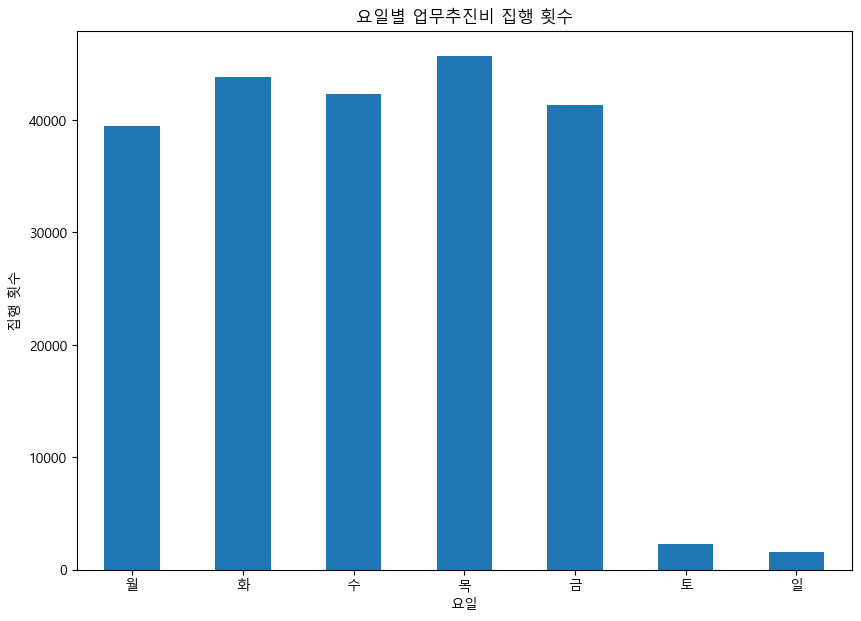

In [163]:
expense_weekday.plot.bar(rot = 0, figsize = (10, 7))
plt.title('요일별 업무추진비 집행 횟수')
plt.xlabel('요일')
plt.ylabel('집행 횟수')
plt.show()

> ## 6) 시간별 집행횟수

* '집행일시_시간' 행(Column) 추가
 - dt.hour : 날짜를 시간으로 변환

In [164]:
df_expense_all['집행일시_시간'] = [hour for hour in expense_date_time.dt.hour]

* 추가 정보 확인

In [165]:
df_expense_all.head()

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액,집행일시_요일,집행일시_시간
0,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000,목,13
1,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000,수,22
2,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-24 12:35,왕왕생고기 (중구 을지로),장애인 기본돌봄 복지시책 논의간담회,장애인복지정책팀장외7명,카드,80000,화,12
3,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-24 12:23,서울불고기 (중구 남대문로),서울시일자리통합지원센터 운영개선 논의간담회,장애인복지정책과장외5명,카드,112000,화,12
4,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-23 15:10,서울시청신매점,부서운영에 필요한 음료수 구매,장애인복지정책과직원,카드,16000,월,15


* 시간별 집행횟수 확인

In [166]:
expense_hour_num = df_expense_all['집행일시_시간'].value_counts()

expense_hour_num

12    87518
20    23013
13    20990
19    16766
21    12210
11     8356
14     8311
15     7168
10     5824
18     5783
16     5169
0      4919
9      3486
17     2889
22     2563
8       875
7       412
23      128
1        44
6        42
3        27
4        26
5        19
2        19
Name: 집행일시_시간, dtype: int64

* 시간순 정렬 : .reindex( )
 - 8시 기준

In [167]:
work_hour = [ (k+8)%24 for k in range(24)]
expense_hour_num = expense_hour_num.reindex(index = work_hour)

expense_hour_num

8       875
9      3486
10     5824
11     8356
12    87518
13    20990
14     8311
15     7168
16     5169
17     2889
18     5783
19    16766
20    23013
21    12210
22     2563
23      128
0      4919
1        44
2        19
3        27
4        26
5        19
6        42
7       412
Name: 집행일시_시간, dtype: int64

* 막대그래프 시각화

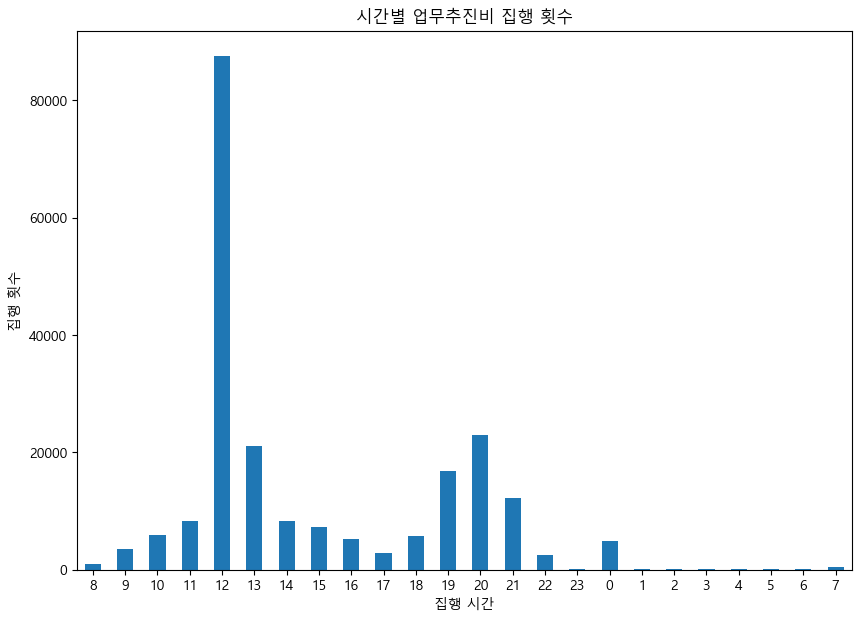

In [168]:
expense_hour_num.plot.bar(rot = 0, figsize = (10, 7))
plt.title('시간별 업무추진비 집행 횟수')
plt.xlabel('집행 시간')
plt.ylabel('집행 횟수')
plt.show()

> ## 7) 시간별 집행금액

* 시간별 .pivot_table( )

In [174]:
df9 = pd.pivot_table(df_expense_all,
                     index = '집행일시_시간',
                    values = '집행금액')
df9

,집행금액
집행일시_시간,
0,171279.348648
1,159640.022727
2,119220.526316
3,267250.444444
4,223785.807692
5,232538.315789
6,82340.047619
7,66692.388350
8,103142.662857


* 막대그래프 시각화

<AxesSubplot: title={'center': '시간별 집행금액'}, xlabel='집행일시_시간', ylabel='집행금액'>

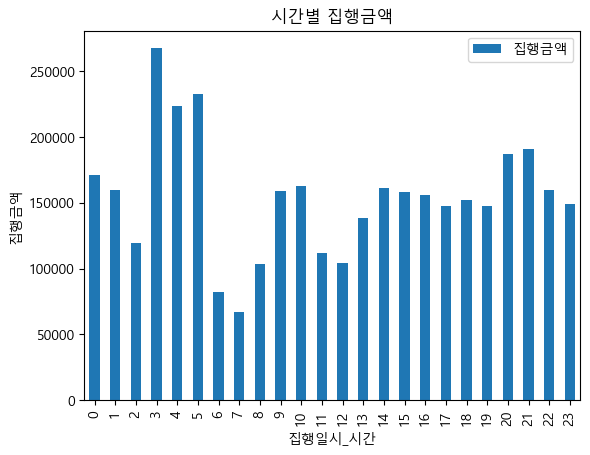

In [176]:
df9.plot(kind='bar', ylabel='집행금액', title = '시간별 집행금액')

# 
# 
# 
# The End
# 
# 
# 